In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")


In [6]:
df = pd.read_csv("Amazon Sale Report.csv")
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [8]:
# Convert Amount to numeric and drop rows with missing Amount
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df_clean = df.dropna(subset=['Amount', 'Qty'])


In [10]:
df_clean.loc[:, 'Month'] = df_clean['Date'].dt.to_period('M').astype(str)


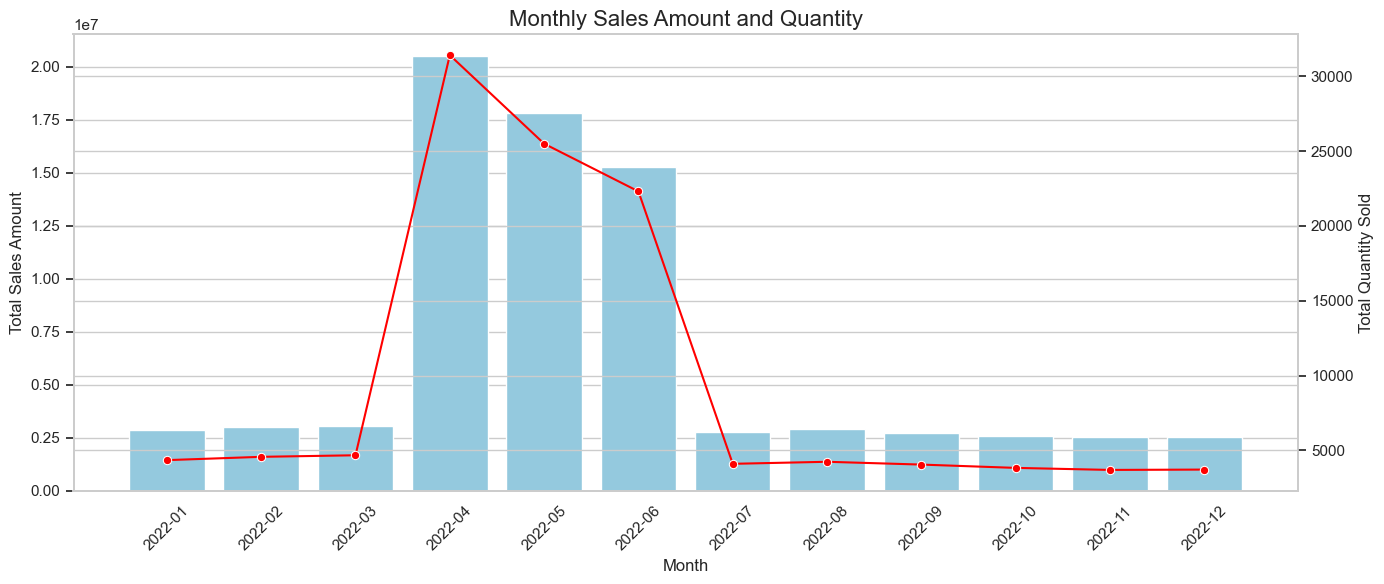

In [11]:
# Plot style set karna (optional, better look ke liye)
sns.set(style="whitegrid")

# Figure aur axis banayein
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar chart for Amount
sns.barplot(
    x="Month",
    y="Amount",
    data=monthly_sales,
    color='skyblue',
    ax=ax1
)

# Axis label aur title
ax1.set_ylabel("Total Sales Amount", fontsize=12)
ax1.set_xlabel("Month", fontsize=12)
ax1.set_title("Monthly Sales Amount and Quantity", fontsize=16)
ax1.tick_params(axis='x', rotation=45)

# Secondary y-axis for Quantity
ax2 = ax1.twinx()
sns.lineplot(
    x="Month",
    y="Qty",
    data=monthly_sales,
    color='red',
    marker='o',
    ax=ax2
)
ax2.set_ylabel("Total Quantity Sold", fontsize=12)

# Show chart
plt.tight_layout()
plt.show()


In [12]:
top_categories = df_clean.groupby("Category").agg({
    "Amount": "sum",
    "Qty": "sum"
}).sort_values(by="Amount", ascending=False).head(10)

print(top_categories)


               Amount    Qty
Category                    
T-shirt   39206756.65  45228
Shirt     21297770.08  44969
Blazzer   11215104.12  13939
Trousers   5346286.30   9894
Perfume     789419.66   1051
Wallet      458408.18    844
Socks       150757.50    398
Shoes       124752.76    153
Watch          915.00      3


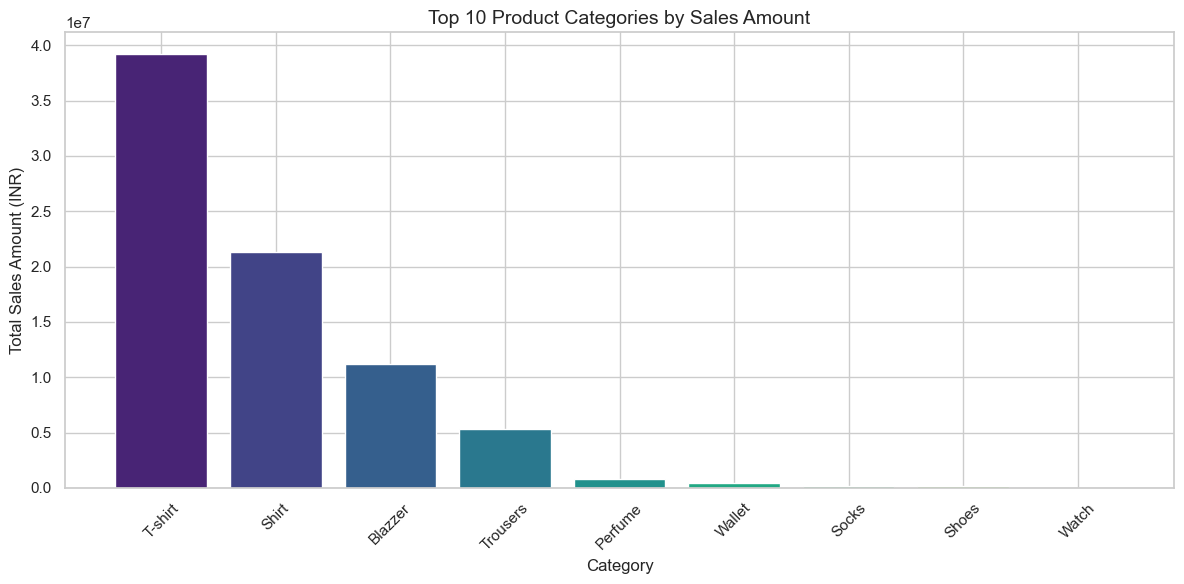

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping & Sorting
top_categories = df_clean.groupby("Category").agg({
    "Amount": "sum",
    "Qty": "sum"
}).sort_values(by="Amount", ascending=False).head(10)

# Custom color palette (length = number of bars)
colors = sns.color_palette("viridis", n_colors=len(top_categories))

# Plot without using `palette` with `hue`
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_categories.index,
    top_categories["Amount"],
    color=colors
)

# Formatting
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories by Sales Amount", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Sales Amount (INR)", fontsize=12)
plt.tight_layout()
plt.show()
